In [1]:
from Solver import *
from q_method import *

In [18]:
N = 128
N_rec = 128
q = q_circle(N,radius = 0.5)

<AxesSubplot:>

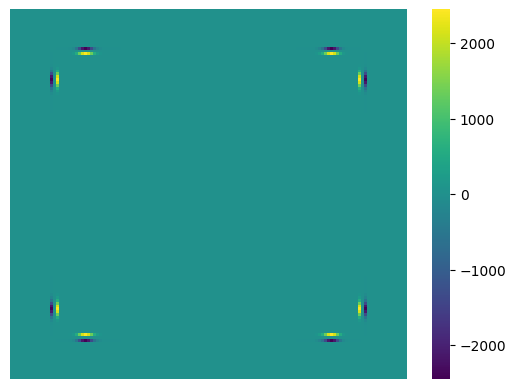

In [19]:
pd = data_projection(q,N,N_rec,True,4, 'N')
qq = data_projection(pd,N,N_rec,False,4,'N')
sns.heatmap(qq.real,**heatmap_params)

<AxesSubplot:>

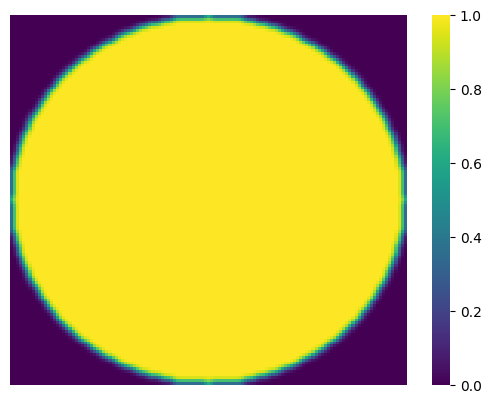

In [20]:
sns.heatmap(q,**heatmap_params)

In [2]:
N = 128
k = 40
scheme='ABC'
q = q_gen(N,'TEST')*0.3
Q = q.reshape(-1,)
f = f_gen(N,k,16)[5]
F = f.reshape(-1,)
expand_times=2
thickness = 0.05

In [43]:
Matrix_analysis(N,scheme=scheme,expand_times=expand_times,thickness=thickness)
Matrix_factorize(N,k,2*Q,scheme=scheme,expand_times=expand_times,thickness=thickness)
data = Matrix_solve(-k*k*2*Q*F,False,scheme=scheme,expand_times=expand_times,Transpose=False,thickness=thickness)
pd = data_projection(data,True,4)

In [44]:
Matrix_factorize(N,k,Q,scheme=scheme,expand_times=expand_times,thickness=thickness)
phi = Matrix_solve(-k*k*Q*F,False,scheme=scheme,expand_times=expand_times,Transpose=False,thickness=thickness)
J_inner = data_projection(phi,True,4) - pd
J_value = 0.5*np.linalg.norm(J_inner,ord=2)**2

In [45]:
Matrix_analysis(N,scheme=scheme,Transpose=False,expand_times=expand_times,thickness=thickness)
Matrix_factorize(N,k,Q,scheme=scheme,Transpose=False,expand_times=expand_times,thickness=thickness)
id = 100
delta = 0.00000001
Qd = np.zeros_like(Q)
Qd[id] += delta
Q1 = Q+Qd
Matrix_factorize(N,k,Q1,scheme=scheme,expand_times=expand_times,thickness=thickness)
phi1 = Matrix_solve(-k*k*Q1*F,False,scheme=scheme,expand_times=expand_times,thickness=thickness)
J_inner1 = data_projection(phi1,True,4) - pd
J_value1 = 0.5*np.linalg.norm(J_inner1,ord=2)**2
print((J_value1-J_value)/delta)

0.023220536604640074


In [46]:
Matrix_analysis(N,scheme=scheme,Transpose=False,expand_times=expand_times,thickness=thickness)
Matrix_factorize(N,k,Q,scheme=scheme,Transpose=False,expand_times=expand_times,thickness=thickness)
fun1 = F + phi.reshape(-1,)
fun2 = data_projection(J_inner,False,4)
fun2 = -k*k*fun2.reshape(-1,)
tmp_fun = Matrix_solve(fun2.real,True,scheme=scheme,expand_times=expand_times,thickness=thickness)
tmp_fun = tmp_fun.reshape(-1,)
tmpr = fun1.real * tmp_fun.real - fun1.imag * tmp_fun.imag
tmp_fun = Matrix_solve(fun2.imag,True,scheme=scheme,expand_times=expand_times,thickness=thickness)
tmp_fun = tmp_fun.reshape(-1,)
tmpi = fun1.imag * tmp_fun.real + fun1.real * tmp_fun.imag
J_grad = (tmpr + tmpi)
print(J_grad[id])

0.01603300194281647


In [47]:
# fun1=F + phi.reshape(-1,)
# phi_loss = Matrix_solve(-k*k*fun1*Qd,True,scheme=scheme,Transpose=False,thickness=thickness).reshape(129,129)
# print(np.linalg.norm(phi1-phi-phi_loss))
# print(np.linalg.norm(phi1-phi))

In [48]:
Matrix_analysis(N,scheme=scheme,Transpose=True,expand_times=expand_times)
Matrix_factorize(N,k,Q,scheme=scheme,Transpose=True,expand_times=expand_times)
fun1 = F + phi.reshape(-1,)
fun2 = data_projection(J_inner,False,4)
fun2 = -k*k*fun2.reshape(-1,)
tmp_fun = Matrix_solve(fun2.real,True,scheme=scheme,expand_times=expand_times,Transpose=True)
tmp_fun = tmp_fun.reshape(-1,)
tmpr = fun1.real * tmp_fun.real - fun1.imag * tmp_fun.imag
tmp_fun = Matrix_solve(fun2.imag,True,scheme=scheme,expand_times=expand_times,Transpose=True)
tmp_fun = tmp_fun.reshape(-1,)
tmpi = fun1.imag * tmp_fun.real + fun1.real * tmp_fun.imag
J_grad = (tmpr + tmpi)
print(J_grad[id])

0.01603300194315912


<AxesSubplot:>

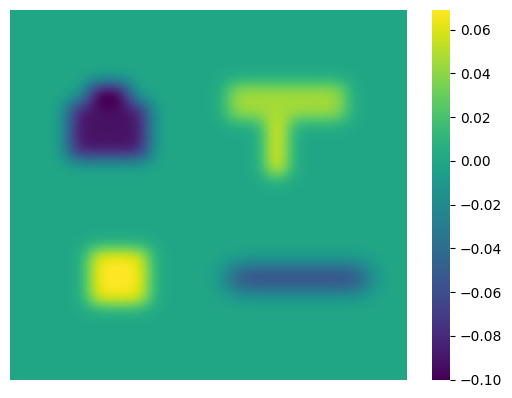

In [5]:
N = 512
q = q_gen(N,'TEST',0.1)
sns.heatmap(q,**heatmap_params)

In [20]:
def Variation(N: int, q: np.ndarray) -> np.ndarray:
    """
    q.shape = ((N-1),(N-1))
    Returns.shape = ((N-1)**2,)
    """
    tmp = np.zeros((N + 1, N + 2))
    tmp[:, 0] = q[:, 0]
    tmp[:, -1] = -q[:, -1]
    tmp[:, 1:-1] = q[:, 1:] - q[:, :-1]
    return tmp


def TV(N: int, Q: np.ndarray) -> float:
    """
    Q.shape = ((N+1)**2,)
    """
    res = 0
    q = Q.reshape(N + 1, N + 1)
    res += abs(Variation(N, q)).sum()
    res += abs(Variation(N, q.transpose())).sum()
    return res


def TV_prime(N: int, Q: np.ndarray) -> np.ndarray:
    """
    Q.shape = ((N+1)**2,)
    """

    q = Q.reshape((N + 1, N + 1))
    res = np.zeros_like(q)

    def judge(q):
        return np.where(q < 0, -1, 1)
    res += np.c_[judge(q[:, :-1] - q[:, 1:]), judge(q[:, -1])]
    res += np.c_[judge(q[:, 0]), judge(q[:, 1:] - q[:, :-1])]
    q1 = q.T
    res += (np.c_[judge(q1[:, :-1] - q1[:, 1:]), judge(q1[:, -1])]).T
    res += (np.c_[judge(q1[:, 0]), judge(q1[:, 1:] - q1[:, :-1])]).T
    return res.reshape(-1,)

In [23]:
TV(512,q)

36.514227691111316

In [24]:
TV_prime(512,q)

array([4., 2., 2., ..., 2., 2., 4.])

# IMSP
$$
\begin{aligned}
\Delta u + k^2(1+q)u&= f\\
\frac{\partial u}{\partial \nu} &= ik u
\end{aligned}
$$

## Five Point Scheme
$$
\begin{aligned}
&\frac{(\delta^2_x + \delta^2_y)u_{j,k}}{h^2} +k^2(1+q_{j,k})u_{j,k}= f(x_j,y_k) \\
&A u_{i,j} = u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \\
&\frac{A-4I}{h^2}u_{i,j} + k^2(1+q_{i,j})u_{i,j} = f_{i,j} \\
&Au_{0,j}=u_{1,j}+u_{1,j}+2h\cdot iku_{0,j}+u_{0,j+1}+u_{0,j-1}\\
&Au_{0,0} = 2u_{1,0}+4h\cdot iku_{0,0}+2u_{0,1}
\end{aligned}$$

## Nine Point Scheme
$$
\begin{aligned}
&\frac{(\delta^2_x + \delta^2_y)u_{j,k}}{h^2} + \frac{\delta^2_x \delta^2_y u_{j,k}}{6h^2} +k^2(1+q_{j,k})u_{j,k}= f(x_j,y_k) + \frac{h^2}{12} \Delta f(x_j,y_k) \\
&A u_{i,j} = u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \\
&B u_{i,j} = u_{i+1,j+1} + u_{i-1,j+1} + u_{i+1,j-1} + u_{i-1,j-1} \\
&\frac{B+4A-20I}{6h^2}u_{i,j} + k^2(1+q_{i,j})u_{i,j} = f_{i,j}+\frac{A-4I}{12} f_{i,j}\\
&u(-1,j) - u(1,j) = -2hu_x(0,j) = 2h\frac{\partial u_{0,j}}{\partial \nu} = 2hiku(0,j)\\
&u(-1,-1) = u(1,-1)-2hu_x(0,-1) = u(1,1) - 2hu_y(1,0)-2hu_x(0,-1)\\
&u_x(0,-1) - u_x(0,1) = -2hu_{xy}(0,0) = 2hk^2u(0,0)\\
&u(-1,-1) = u(1,1)+i\cdot 2hk (u(1,0)+u(0,1))-4h^2k^2u(0,0)\\
&Au_{0,0} = u_{-1,0}+u_{1,0}+u_{0,-1}+u_{0,1} = 
2u_{1,0}+2u_{0,1} + i4hku_{0,0}\\
&Bu_{0,0}=u_{-1,-1} + u_{1,1} + u_{1,-1}+u_{-1,1} = 4u_{1,1}+i4hk(u_{1,0}+u_{0,1})-4h^2k^2u_{0,0}\\
&Au_{0,j} = u_{-1,j}+u_{1,j}+u_{0,j-1}+u_{0,j+1} = 2u_{1,j}+2ihku_{0,j} + u_{0,j-1}+u_{0,j+1}\\
&Bu_{0,j} = u_{-1,j-1}+u_{-1,j+1}+u_{1,j-1}+u_{1,j+1} = 2(u_{1,j-1}+u_{1,j+1})+2ihk(u_{0,j-1}+u_{0,j+1})
\end{aligned}$$

In [2]:
def Matrix_Gen_9(N, Q, k):
    '''
    data1 : middle
    data2 : middle +- 1
    data3 : middle +- M
    data4 : middle + M +- 1
    data5 : middle - M +- 1
    data6 : middle +- M^2
    data7 : middle - M^2 +- 1
    data8 : middle - M^2 +- M
    data9 : middle + M^2 +- 1
    data10 : middle + M^2 +- M
    '''
    M = N + 1
    Matrix1 = (k * k * (1 + Q) - 10 * N * N / 3).reshape(M,M)
    Matrix1[0,0] -= 2 * k * k / 3
    Matrix1[0,-1] -= 2 * k * k / 3
    Matrix1[-1,0] -= 2 * k * k / 3
    Matrix1[-1,-1] -= 2 * k * k / 3
    data1 = np.tile(Matrix1.reshape(-1,),2)
    
    Matrix2_plus = np.ones((M,M)) * N * N * 2 / 3
    Matrix2_plus[:,0] = 0
    Matrix2_plus[:,1] *= 2
    data2_plus = np.tile(Matrix2_plus.reshape(-1,),2)
    Matrix2_minus = Matrix2_plus[:,::-1]
    data2_minus = np.tile(Matrix2_minus.reshape(-1,),2)
    
    Matrix3_plus = Matrix2_plus.T
    data3_plus = np.tile(Matrix3_plus.reshape(-1,),2)
    Matrix3_minus = Matrix3_plus[::-1,:]
    data3_minus = np.tile(Matrix3_minus.reshape(-1,),2)
    
    Matrix4_plus = np.ones((M, M)) * N * N / 6
    Matrix4_plus[0,:] = 0
    Matrix4_plus[:,0] = 0
    Matrix4_plus[1,:] *= 2
    Matrix4_plus[:,1] *= 2
    Matrix4_plus[1,1] *= 4
    data4_plus = np.tile(Matrix4_plus.reshape(-1,), 2)
    Matrix4_minus = Matrix4_plus[:,::-1]
    data4_minus = np.tile(Matrix4_minus.reshape(-1), 2)
    
    Matrix5_plus = Matrix4_plus[::-1,:]
    Matrix5_minus = Matrix4_minus[::-1,:]
    data5_plus = np.tile(Matrix5_plus.reshape(-1), 2)
    data5_minus = np.tile(Matrix5_minus.reshape(-1), 2)
    
    
    Matrix6 = np.zeros((M, M))
    Matrix6[0,1:-1] = 2 * k * N * 2 / 3
    Matrix6[-1,1:-1] = 2 * k * N * 2 / 3
    Matrix6[1:-1,0] = 2 * k * N * 2 / 3
    Matrix6[1:-1,-1] = 2 * k * N * 2 / 3
    data6_minus = np.tile(Matrix6.reshape(-1), 2)
    data6_plus = -data6_minus
    
    Matrix7_plus = np.zeros((M,M))
    Matrix7_plus[0,1] = 4 * k * N / 6
    Matrix7_plus[0,2:] = 2 * k * N / 6
    Matrix7_plus[-1] = Matrix7_plus[0]
    data7_plus = np.tile(Matrix7_plus.reshape(-1,),2)
    Matrix7_minus = Matrix7_plus[:,::-1]
    data7_minus = np.tile(Matrix7_minus.reshape(-1,),2)
    
    Matrix8_plus = Matrix7_plus.T
    data8_plus = np.tile(Matrix8_plus.reshape(-1,),2)
    Matrix8_minus = Matrix8_plus[::-1,:]
    data8_minus = np.tile(Matrix8_minus.reshape(-1,),2)
    
    data9_plus = - data7_plus
    data9_minus = - data7_minus
    data10_plus = - data8_plus
    data10_minus = -data8_minus
    
    data = (np.c_[data1,
                  data2_plus,data2_minus,
                  data3_plus,data3_minus,
                  data4_plus,data4_minus,
                  data5_plus,data5_minus,
                  data6_plus,data6_minus,
                  data7_plus,data7_minus,
                  data8_plus,data8_minus,
                  data9_plus,data9_minus,
                  data10_plus,data10_minus]).transpose()
    offsets = np.array([0,
                        1, -1,
                        M, -M,
                        M + 1,M - 1,
                        -M + 1, -M - 1,
                        M * M, -M * M,
                       -M * M + 1, -M*M -1,
                       -M * M + M, -M*M -M,
                       M * M + 1, M*M -1,
                       M * M + M, M*M -M])
    dia = dia_matrix((data, offsets), shape=(2 * M * M, 2 * M * M))
    mat = dia.tocoo()
    return mat

$$\begin{aligned}
&\quad2f(0,j)-5f(1,j)+4f(2,j)-f(3,j) \\
=&2f(0,j)-5[f(0,j)+hf_x(0,j)+\frac{h^2}{2}f_{xx}(0,j)+\frac{h^3}{6}f_{xxx}(0,j)+o(h^4)]\\
&+4[f(0,j)+2hf_x(0,j)+\frac{(2h)^2}{2}f_{xx}(0,j)+\frac{(2h)^3}{6}f_{xxx}(0,j)+o(h^4)]\\
&-[f(0,j)+3hf_x(0,j)+\frac{(3h)^2}{2}f_{xx}(0,j)+\frac{(3h)^3}{6}f_{xxx}(0,j)+o(h^4)]\\
=&h^2f_{xx}(0,j)+o(h^4)\\
&h^2f_{yy}(0,j) = f(0,j-1)+f(0,j+1)-2f(0,j) + o(h^4)\\
&h^2\Delta f(0,j) = f(0,j-1) + f(0,j+1) - 5f(1,j)+4f(2,j) - f(3,j) + o(h^4)\\
&h^2\Delta f(0,0) =4f(0,0)-5f(1,0)+4f(2,0)-f(3,0)-5f(0,1)+4f(0,2)-f(0,3) + o(h^4)
\end{aligned}$$

In [3]:
def F_laplacian(F):
    N = int(np.sqrt(F.shape[0])) - 1
    f = F.reshape((N+1,N+1))
    f1 = np.zeros_like(f)
    f1[1:-1,1:-1] = f[2:,1:-1] + f[:-2,1:-1] + f[1:-1,:-2] + f[1:-1,2:] - 4*f[1:-1,1:-1]
    f1[0,0] = 4*f[0,0]-5*f[1,0]+4*f[2,0]-f[3,0]-5*f[0,1]+4*f[0,2]-f[0,3]
    f1[0,-1] = 4*f[0,-1]-5*f[1,-1]+4*f[2,-1]-f[3,-1]-5*f[0,-2]+4*f[0,-3]-f[0,-4]
    f1[-1,0] = 4*f[-1,0]-5*f[-2,0]+4*f[-3,0]-f[-4,0]-5*f[-1,1]+4*f[-1,2]-f[-1,3]
    f1[-1,-1] = 4*f[-1,-1]-5*f[-2,-1]+4*f[-3,-1]-f[-4,-1]-5*f[-1,-2]+4*f[-1,-3]-f[-1,-4]
    f1[0,1:-1] = f[0,:-2]+f[0,2:]-5*f[1,1:-1]+4*f[2,1:-1]-f[3,1:-1]
    f1[-1,1:-1] = f[-1,:-2]+f[-1,2:]-5*f[-2,1:-1]+4*f[-3,1:-1]-f[-4,1:-1]
    f1[1:-1,0] = f[:-2,0]+f[2:,0]-5*f[1:-1,1]+4*f[1:-1,2]-f[1:-1,3]
    f1[1:-1,-1] = f[:-2,-1]+f[2:,-1]-5*f[1:-1,-2]+4*f[1:-1,-3]-f[1:-1,-4]
    return f1.reshape(-1)

In [4]:
N = 1024
M = N + 1
Q = q_gen(N,'T').reshape(-1,)
k = 40
F = q_gen(N,'G').reshape(-1,) + 1j *q_gen(N,'MG').reshape(-1,)
scheme = 5
Matrix_analysis(N,scheme=scheme)
Matrix_factorize(N,k,Q,scheme=scheme)
rhs_t = Matrix_solve(F,scheme=scheme)

In [5]:
N1 = 64
M1 = N1 + 1
Q1 = q_gen(N1,'T').reshape(-1,)
k = 40
F1 = q_gen(N1,'G').reshape(-1,) + 1j *q_gen(N1,'MG').reshape(-1,)
Matrix_analysis(N1,scheme=5)
Matrix_factorize(N1,k,Q1,scheme=5)
rhs_5 = Matrix_solve(F1,scheme=5)
Matrix_analysis(N1,scheme=9)
Matrix_factorize(N1,k,Q1,scheme=9)
rhs_9 = Matrix_solve(F1,scheme=9)

In [6]:
# M5 = Matrix_Gen_5(N1,Q1,k)
# M9 = Matrix_Gen_9(N1,Q1,k)
# FF = np.append(F1.real,F1.imag)
# FFF = np.append(F1.real+F_laplacian(F1.real)/12,F1.imag+F_laplacian(F1.imag)/12)
# E5 = M5 @ (np.append(rhs_5.real,rhs_5.imag)) - FF
# E9 = M9 @ (np.append(rhs_9.real,rhs_9.imag)) - FFF
# print(np.linalg.norm(E5),np.linalg.norm(E9))

相对误差为6.72%


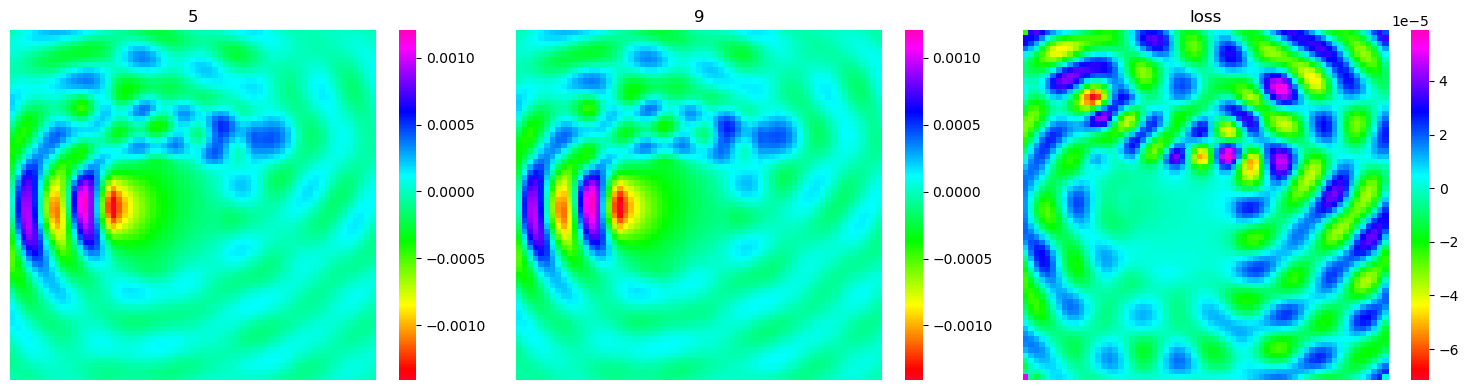

相对误差为45.61%


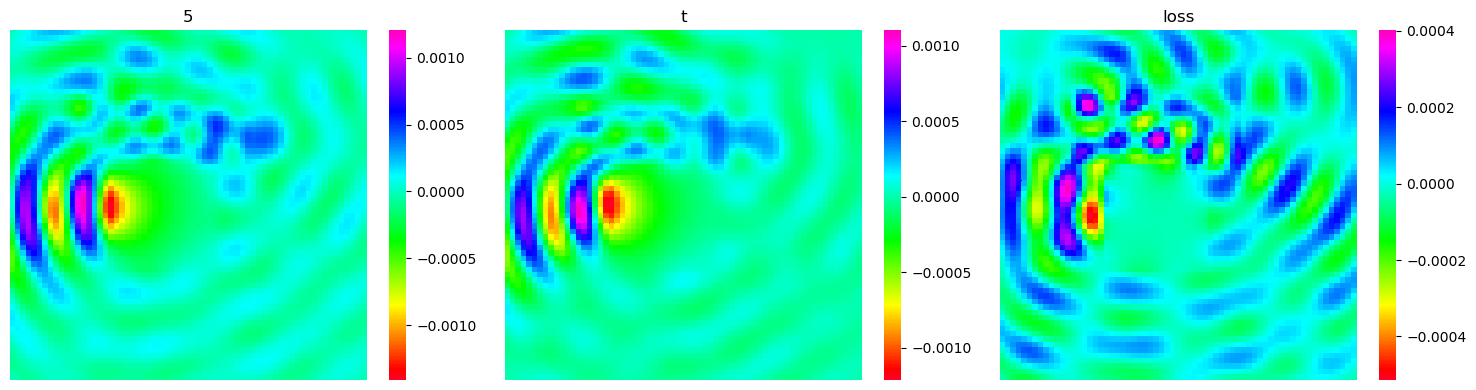

相对误差为45.80%


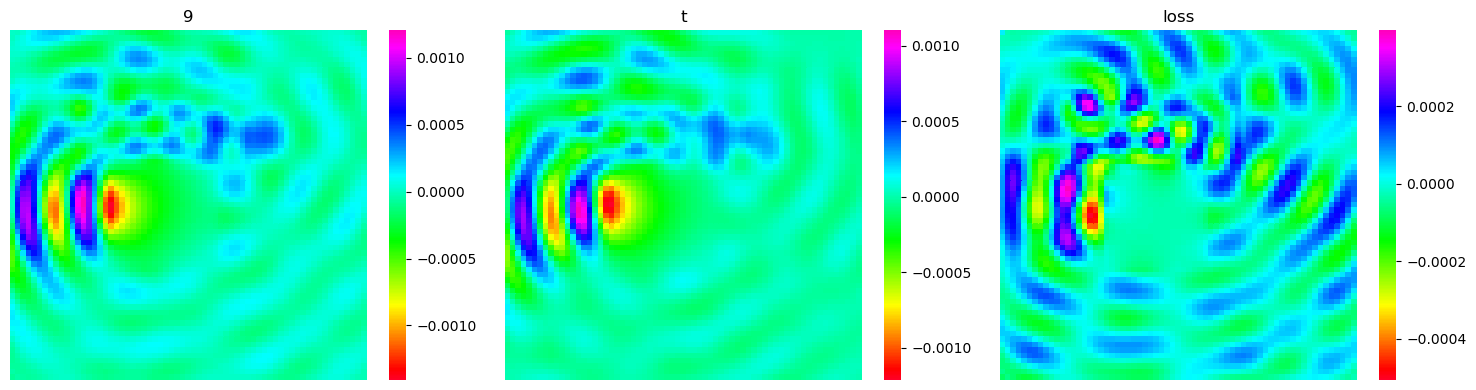

In [7]:
times = N // N1
heatmap_for_test(rhs_5.real.reshape(M1,M1),rhs_9.real.reshape(M1,M1)[::1,::1],['5','9','loss'])
heatmap_for_test(rhs_5.real.reshape(M1,M1),rhs_t.real.reshape(M,M)[::times,::times],['5','t','loss'])
heatmap_for_test(rhs_9.real.reshape(M1,M1),rhs_t.real.reshape(M,M)[::times,::times],['9','t','loss'])

## Test for Five Point Scheme
$$
\begin{aligned}
& u_t(x,y) = \sin^2(m_1\pi x) \sin^2(m_2\pi y)\\
& \Delta u_t(x,y) = 2m_1^2\pi^2 cos(2m_1\pi x) \sin^2(m_2\pi y) +2m_2^2 \pi^2cos(2m_2\pi y) \sin^2(m_1\pi x))\\
& \Delta u(x,y) + k^2 (1+q(x,y)) u(x,y) = f(x,y) = \Delta u_t(x,y) + k^2 (1+q(x,y)) u_t(x,y))\\
& \frac{\partial u}{\partial \nu} = iku
\end{aligned}$$

6.283185307179586 9.42477796076938
相对误差为0.01%


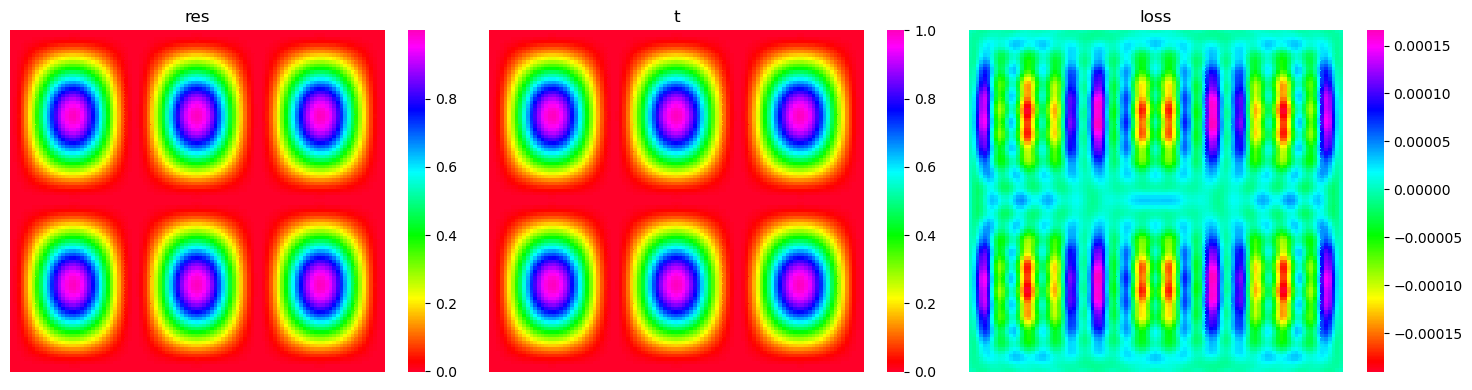

/data/liuziyang/Programs/pde_solver/src/utils.py:202: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = 100*(np.linalg.norm(data3)/np.linalg.norm(data2))


相对误差为inf%


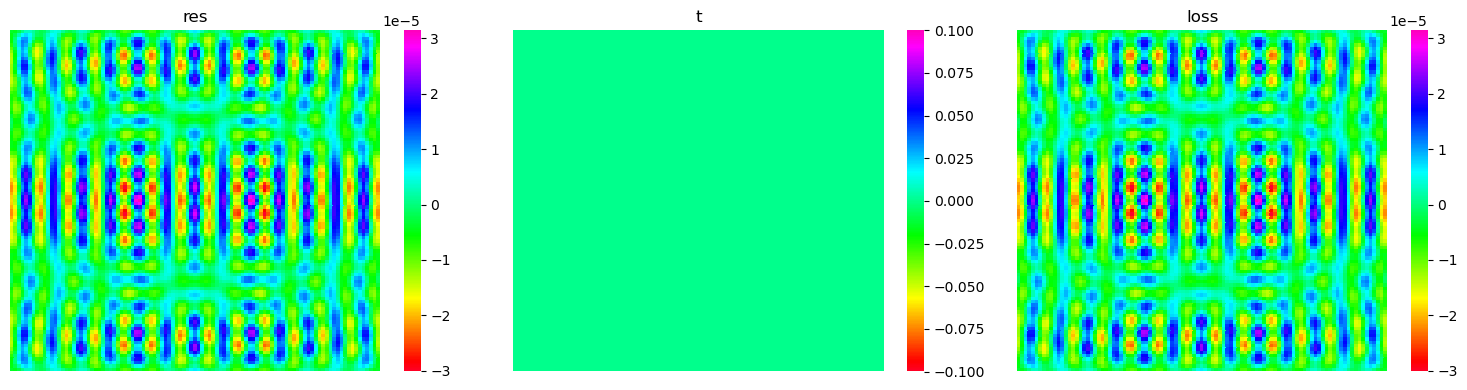

In [2]:
N = 100
k = 80
m1 = 2
m2 = 3
print(m1*np.pi,m2*np.pi)
Q = q_gen(N,'MG').reshape(-1,)*0
l = np.linspace(0,1,N+1)
Y,X = np.meshgrid(l,l)
u_t = (np.sin(m1*np.pi*X)**2*np.sin(m2*np.pi*Y)**2).reshape(-1,)
F = u_t*(k*k*(1+Q))+(2*m1**2*np.pi**2*(np.cos(2*m1*np.pi*X) * np.sin(m2*np.pi*Y)**2) + 2*m2**2*np.pi**2*(np.cos(2*m2*np.pi*Y) * np.sin(m1*np.pi*X)**2 )).reshape(-1,)
scheme = 5
Matrix_analysis(N,k,scheme=scheme)
Matrix_factorize(N,k,Q,scheme=scheme)
rhs_t = Matrix_solve(F,scheme=scheme)
heatmap_for_test(rhs_t.real.reshape(N+1,N+1),u_t.real.reshape(N+1,N+1),['res','t','loss'])
heatmap_for_test(rhs_t.imag.reshape(N+1,N+1),u_t.imag.reshape(N+1,N+1),['res','t','loss'])

81.68140899333463 75.39822368615503
相对误差为1.49%


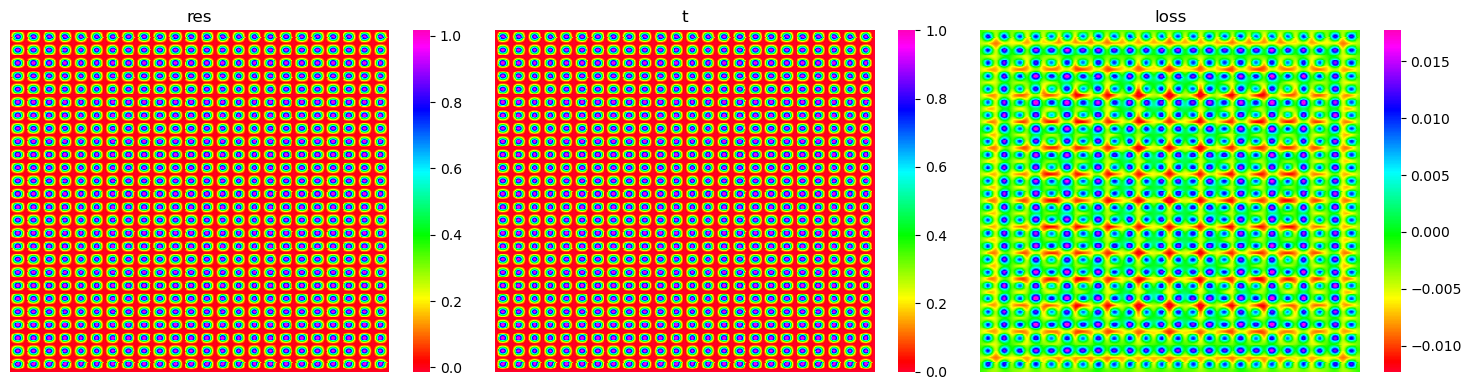

相对误差为inf%


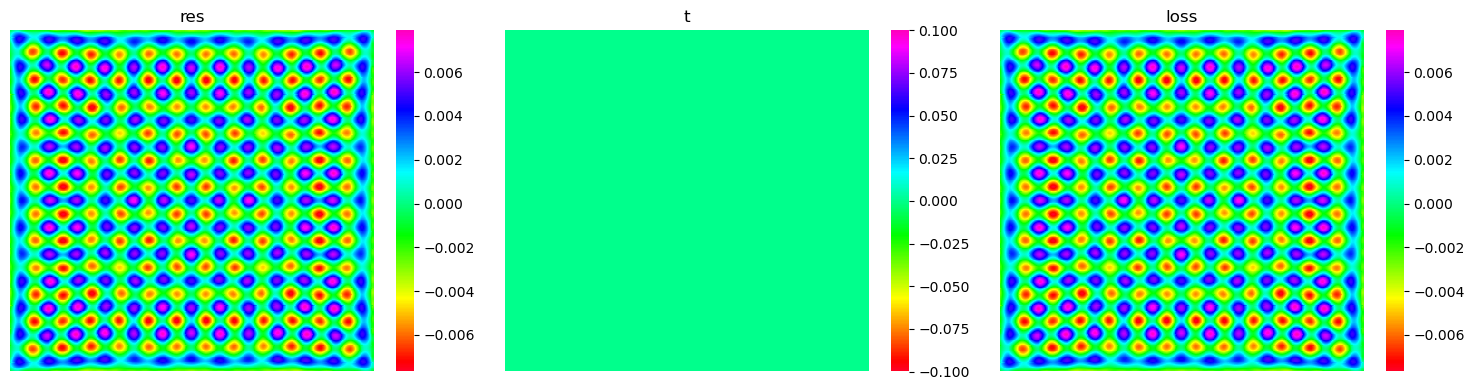

In [4]:
N = 400
k = 80
m1 = 26
m2 = 24
print(m1*np.pi,m2*np.pi)
Q = q_gen(N,'MG').reshape(-1,)*0
l = np.linspace(0,1,N+1)
Y,X = np.meshgrid(l,l)
u_t = (np.sin(m1*np.pi*X)**2*np.sin(m2*np.pi*Y)**2).reshape(-1,)
F = u_t*(k*k*(1+Q))+(2*m1**2*np.pi**2*(np.cos(2*m1*np.pi*X) * np.sin(m2*np.pi*Y)**2) + 2*m2**2*np.pi**2*(np.cos(2*m2*np.pi*Y) * np.sin(m1*np.pi*X)**2 )).reshape(-1,)
scheme = 5
Matrix_analysis(N,k,scheme=scheme)
Matrix_factorize(N,k,Q,scheme=scheme)
rhs_t = Matrix_solve(F,scheme=scheme)
heatmap_for_test(rhs_t.real.reshape(N+1,N+1),u_t.real.reshape(N+1,N+1),['res','t','loss'])
heatmap_for_test(rhs_t.imag.reshape(N+1,N+1),u_t.imag.reshape(N+1,N+1),['res','t','loss'])

In [1]:
from utils import *

In [14]:
a = np.load('../Dataset/tmp_boundary.npz')
f = a['f']
p = a['p']
round_method = 1
p1 = Round(p,0.4,round_method)
p2 = Round(p,0.2,round_method)
p3 = Round(p,0.1,round_method)

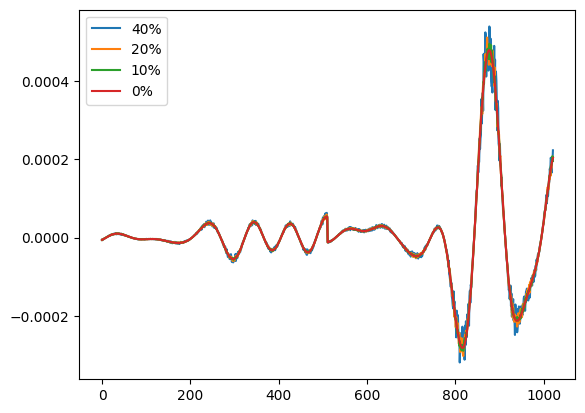

In [16]:
plt.plot(p1[0,3].real,label = '40%')
plt.plot(p2[0,3].real,label = '20%')
plt.plot(p3[0,3].real,label = '10%')
plt.plot(p[0,3].real,label = '0%')
plt.legend()